# Parallel Computing

## General thoughts

With parallel computing we try to **harnesses the power of multiple processors (typically CPU cores) at once**.

There are many types of parallelism:

* **Instruction level parallelism** (e.g. SIMD)
* **Multi-threading** (shared memory)
* **Multi-processing** (shared system memory)
* **Distributed processing** (typically no shared memory)

And then there are highly-parallel hardware accelerators like **GPUs**.

Important: **At the center of any efficient parallel code is a fast serial code!!**

### Why go parallel?

<img src="imgs/50-years-processor-trend.png" width=700px>

**Source:** [Karl Rupp, "Microprocessor trend data repository".](https://github.com/karlrupp/microprocessor-trend-data)

### When go parallel?

* If parts of your (optimized!) serial code aren't fast enough.
  * note that parallelization typically increases the code complexity.
* If your system has multiple execution units (CPU cores, GPU streaming multiprocessors, ...).
  * particularly important on large supercomputers but also already on modern desktop computers and laptops.

### How many CPU threads / cores do I have?

In [1]:
using Hwloc
Hwloc.num_physical_cores()

10

Note that there may be more than one CPU thread per physical CPU core (e.g. hyperthreading).

In [2]:
Sys.CPU_THREADS

20

### How many CPU threads / cores does Noctua 2 have?

[Noctua 2 has more than 143k CPU cores!](https://pc2.uni-paderborn.de/de/hpc-services/available-systems/noctua2)

Even if you only use a **single node** you have access to 128 CPU cores (64 per CPU socket). Hence, if you would use only a single core, the node utilization would be less than 1%.

#### Noctua 2 compute node

<img src="./imgs/lstopo_noctua2.svg" width=100%>

### Amdahl's law

Naive strong scaling expectation: I have 4 cores, give me my 4x speedup!

> If $p$ is the fraction of a code that can be parallelized, then the maximal theoretical speedup by parallelization on $n$ cores is given by $$ F(n) = \frac{1}{1 - p + p / n} $$

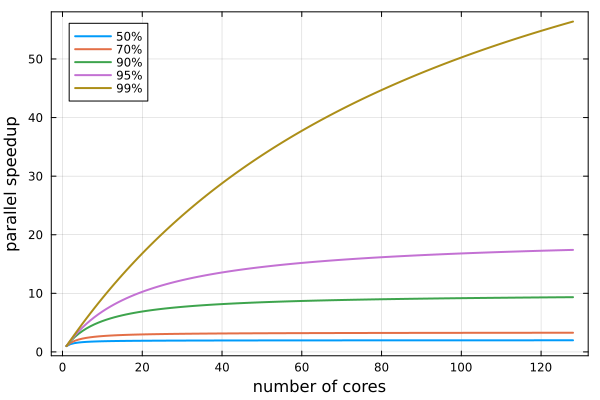

In [3]:
using Plots
F(p,n) = 1/(1-p + p/n)

pl = plot()
for p in (0.5, 0.7, 0.9, 0.95, 0.99)
    plot!(pl, n -> F(p,n), 1:128, lab="$(Int(p*100))%", lw=2,
        legend=:topleft, xlab="number of cores", ylab="parallel speedup", frame=:box)
end
pl

### [Parallel computing](https://docs.julialang.org/en/v1/manual/parallel-computing/) in Julia

Julia provides support for all types of parallelism mentioned above

|                                                         |                                                                                                                                                                                       |
|---------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Instruction level parallelism** (e.g. SIMD)           | → [`@simd`](https://docs.julialang.org/en/v1/base/base/#Base.SimdLoop.@simd), [SIMD.jl](https://github.com/eschnett/SIMD.jl), ...                                                     |
| **Multi-threading** (shared memory)                     | → [Base.Threads](https://docs.julialang.org/en/v1/base/multi-threading/), [ThreadsX.jl](https://github.com/tkf/ThreadsX.jl), [FLoops.jl](https://github.com/JuliaFolds/FLoops.jl), .. |
| **Multi-processing** (shared system memory)             | → [Distributed.jl](https://docs.julialang.org/en/v1/stdlib/Distributed/), [MPI.jl](https://github.com/JuliaParallel/MPI.jl), ...                                                      |
| **Distributed processing** (typically no shared memory) | → [Distributed.jl](https://docs.julialang.org/en/v1/stdlib/Distributed/), [MPI.jl](https://github.com/JuliaParallel/MPI.jl), ...                                                      |
| **GPU programming**                                     | → [CUDA.jl](https://github.com/JuliaGPU/CUDA.jl), [AMDGPU.jl](https://github.com/JuliaGPU/AMDGPU.jl), [KernelAbstractions.jl](https://github.com/JuliaGPU/KernelAbstractions.jl), ... |